In [10]:
# Install required packages.
import os
# Helper function for visualization.
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# datafile = './data/PlateauBorder/raw128/stdata.bin'
datafile = "D:/Downloads/foamGNN/raw/2/stdata.bin"

stdata = np.fromfile(datafile, dtype=np.float32)
print(stdata.shape)
print(np.sum(stdata>0))
sizefile = './data/PlateauBorder/rawz/stnum.txt'
sizes = np.loadtxt(sizefile, dtype=np.int32)
# print(sizes)

stdata = stdata.reshape(sizes)

sum = np.sum(stdata)
print(sum)

print(stdata.shape)

stdata_pos = np.sum(stdata, axis=(2, 3))
stdata_pos = stdata_pos / np.sum(stdata_pos) * sizes[0]*sizes[1] / np.pi/4
print("Shape of positive data: ", stdata_pos.shape)
print("Sum of positive data: ", np.sum(stdata_pos))

stdata_dir = np.sum(stdata, axis=(0, 1))
stdata_dir = stdata_dir / np.sum(stdata_dir) * sizes[2]*sizes[3] / np.pi/4
print("Shape of directional data: ", stdata_dir.shape)
print("Sum of directional data: ", np.sum(stdata_dir))

stdata = stdata / np.sum(stdata) * np.prod(sizes) / np.pi/np.pi/16

(4194304,)
747167
66283000.0
(32, 64, 32, 64)
Shape of positive data:  (32, 64)
Sum of positive data:  162.97466164309506
Shape of directional data:  (32, 64)
Sum of directional data:  162.9746616345351


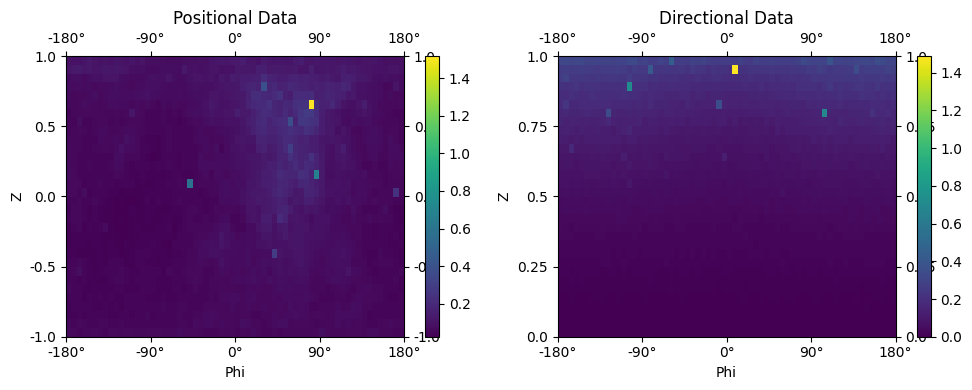

In [12]:
# Define the ranges for theta and phi
z_min, z_max = -1, 1
phi_min, phi_max = -np.pi,  np.pi

# Define tick positions in radians
z_ticks_pos = np.linspace(z_min, z_max, 5)        # -1, -0.5, 0, 0.5, 1
z_ticks_dir = np.linspace(0, z_max, 5)          # 0, 0.25, 0.5, 0.75, 1
phi_ticks = np.linspace(phi_min, phi_max, 5)      # 0, 0.5pi, pi, 1.5pi, 2pi

# Convert tick positions to degrees for labeling
z_tick_pos_labels = [z for z in z_ticks_pos]
z_tick_dir_labels = [z for z in z_ticks_dir]
phi_tick_labels = [f"{int(np.degrees(p))}°" for p in phi_ticks]

fig, ax = plt.subplots(1, 2, figsize=(10, 4))  # Increased figsize for better space

# Common settings for all plots
extent_pos = [ phi_min, phi_max,z_min, z_max]
extent_dir = [phi_min, phi_max,0, z_max]
xlabel = 'Phi'
ylabel = 'Z'

# Function to format axes
def format_axes(ax, z_ticks, phi_ticks, z_tick_labels, phi_tick_labels):
    # Set x and y ticks
    ax.set_xticks(phi_ticks)
    ax.set_yticks(z_ticks)

    # Set tick labels in degrees
    ax.set_xticklabels(phi_tick_labels)
    ax.set_yticklabels(z_tick_labels)
    
    # Enable ticks on top and right
    ax.tick_params(top=True, right=True, labeltop=True, labelright=True)

max_pos_idx = np.unravel_index(np.argmax(stdata_pos), stdata_pos.shape)
# stdata_pos[max_pos_idx] = 0

# Plot heatmap for data_pos (log scale)
im0 = ax[0].imshow(
    # np.log(stdata_pos + 1),
    stdata_pos,
    extent=extent_pos,
    aspect='auto',
    origin='lower'
)
ax[0].set_title('Positional Data')
ax[0].set_xlabel(xlabel)
ax[0].set_ylabel(ylabel)
format_axes(ax[0], z_ticks_pos, phi_ticks, z_tick_pos_labels, phi_tick_labels)
fig.colorbar(im0, ax=ax[0], orientation='vertical')

# Plot heatmap for data_dir (log scale)
im1 = ax[1].imshow(
    # np.log(stdata_dir + 1),
    stdata_dir,
    extent=extent_dir,
    aspect='auto',
    origin='lower'
)
ax[1].set_title('Directional Data')
ax[1].set_xlabel(xlabel)
ax[1].set_ylabel(ylabel)
format_axes(ax[1], z_ticks_dir, phi_ticks, z_tick_dir_labels, phi_tick_labels)
fig.colorbar(im1, ax=ax[1], orientation='vertical')

plt.tight_layout()
plt.show()



(32, 64)


[Text(-1.0, 0, '-1'),
 Text(-0.5, 0, '-0'),
 Text(0.0, 0, '0'),
 Text(0.5, 0, '0'),
 Text(1.0, 0, '1')]

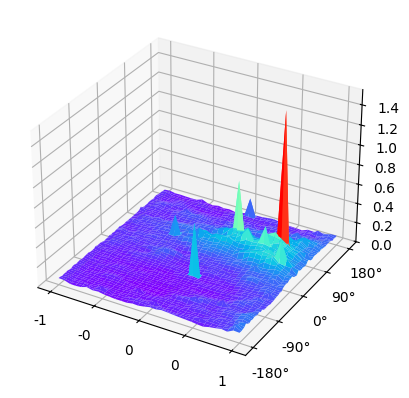

In [13]:

shape = (32, 64, 32, 64)

z_in = np.linspace(-1, 1, 32)
theta_in=np.linspace(-np.pi, np.pi, 64)

Z, THETA = np.meshgrid(z_in, theta_in, indexing='ij')
print(THETA.shape)


fig = plt.figure('拟合图')
ax = fig.add_subplot(projection='3d')
ax.plot_surface(Z, THETA,(stdata_pos), rstride=1, cstride=1, cmap='rainbow')
phi_ticks = np.linspace(-np.pi, np.pi, 5)
phi_tick_labels = [f'{np.degrees(tick):.0f}°' for tick in phi_ticks]
x_ticks = np.linspace(-1, 1, 5)
x_tick_labels = [f'{tick:.0f}' for tick in x_ticks]
ax.set_yticks(phi_ticks)
ax.set_yticklabels(phi_tick_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_tick_labels)

In [20]:
max_pos = np.unravel_index(np.argmax(stdata_pos), stdata_pos.shape)
print(max_pos)
max_dir = stdata[max_pos[0],max_pos[1],:,:]


(np.int64(26), np.int64(46))


(32, 64)


Text(0.5, 0.5, 'Phi')

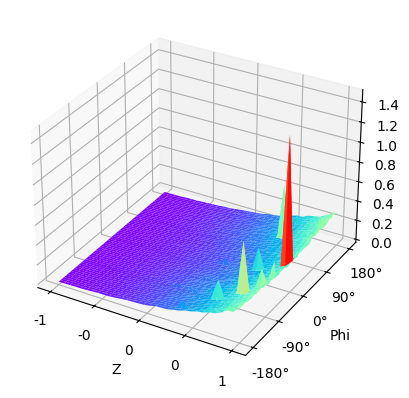

In [25]:

shape = (32, 64, 32, 64)

z_in = np.linspace(-1, 1, 32)
theta_in=np.linspace(-np.pi, np.pi, 64)

Z, THETA = np.meshgrid(z_in, theta_in, indexing='ij')
print(THETA.shape)



fig = plt.figure('拟合图')
ax = fig.add_subplot(projection='3d')
ax.plot_surface(Z, THETA,(stdata_dir), rstride=1, cstride=1, cmap='rainbow')
phi_ticks = np.linspace(-np.pi, np.pi, 5)
phi_tick_labels = [f'{np.degrees(tick):.0f}°' for tick in phi_ticks]
x_ticks = np.linspace(-1, 1, 5)
x_tick_labels = [f'{tick:.0f}' for tick in x_ticks]
ax.set_yticks(phi_ticks)
ax.set_yticklabels(phi_tick_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_tick_labels)
ax.set_xlabel('Z')
ax.set_ylabel('Phi')

(32, 64)


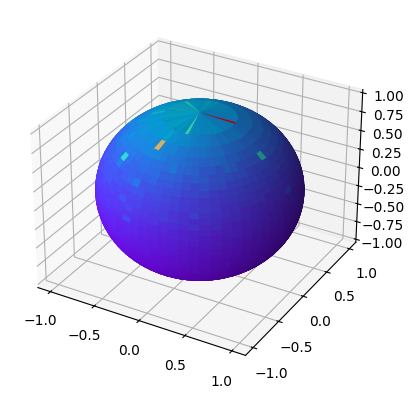

In [14]:
# 定义 z 和 theta 的取值范围
z_in = np.linspace(-1, 1, 32)  # 从南极到北极，高度范围 [-1, 1]
theta_in = np.linspace(-np.pi, np.pi, 64)  # 球面上横向角度 [-π, π]

# 生成网格
Z, THETA = np.meshgrid(z_in, theta_in, indexing='ij')
print(THETA.shape)

# 将 z 和 theta 转换为球面坐标 (r, theta, phi)
# 假设球体的半径为 1
R = np.sqrt(1 - Z**2)
PHI = THETA

# 将球面坐标转换为笛卡尔坐标
X = R * np.cos(PHI)
Y = R * np.sin(PHI)

# 绘图
fig = plt.figure('拟合图')
ax = fig.add_subplot(projection='3d')

# 在球面上绘制数据
ax.plot_surface(X, Y, Z, facecolors=plt.cm.rainbow(stdata_dir), rstride=1, cstride=1)

plt.show()